In [1]:
# Add Matplotlib inline command
%matplotlib inline

# Dependencies and setup
import matplotlib.pyplot as plt
import pandas as pd
import os

In [2]:
# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read city_data and stor in DataFrame
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [3]:
# Read the ride date and store in DataFrame
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


### Inspect Code

In [4]:
# Get the columns and the rows that are not null
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [5]:
# Get the columns and the rows that are not null.
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [6]:
# Get the data types for each column
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [7]:
# Get the unique values of the type of city
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [8]:
# Get the number of data points for the Urban cities
sum(city_data_df["type"]=="Urban")

66

In [9]:
# Get the columns and the rows that are not null.
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [10]:
# Get the data types for each column
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

### Merge DataFrames

In [11]:
# Combine the data into a single dataset (merge)
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


### Bread down data 

In [12]:
# Create the Urban city DataFrame
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]

urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [13]:
# Create the Suburban and Rural city DataFrame
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [14]:
# Get the number of rides for urban cities
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [15]:
# Create Suburban and rural ride counts
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]


In [16]:
# Get average fare for each city in the urban cities
urban_avg_fare= urban_cities_df.groupby(["city"]).mean()["fare"]
urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [17]:
# Get average fare for each city in the suburban and rural cities
suburban_avg_fare= suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare= rural_cities_df.groupby(["city"]).mean()["fare"]


In [18]:
# Get the average number of drivers for each urban city
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [19]:
# Get the average number of drivers for Suburban and rural cities
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]


### Plot Charts

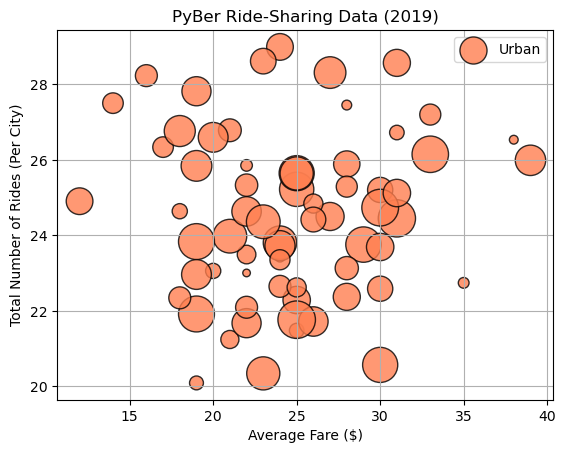

In [20]:
# Build the scatter plots for the urban cities
plt.scatter(urban_ride_count,
            urban_avg_fare,
            s=10*urban_driver_count, c="coral",
            edgecolor="black", linewidths=1,
            alpha=0.8, label="Urban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.xlabel("Average Fare ($)")
plt.ylabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()

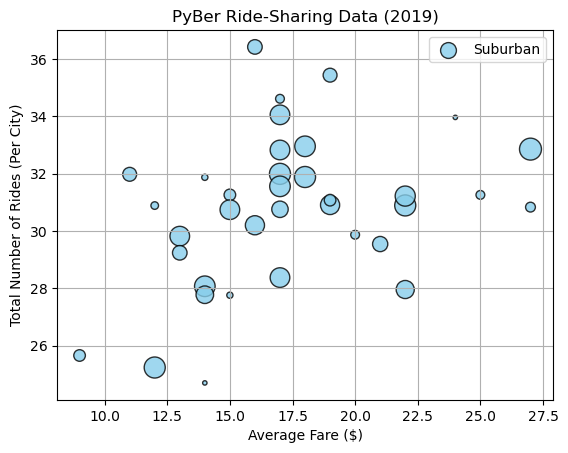

In [21]:
# Build the scatter plots for the Suburban cities
plt.scatter(suburban_ride_count,
            suburban_avg_fare,
            s=10*suburban_driver_count, c="skyblue",
            edgecolor="black", linewidths=1,
            alpha=0.8, label="Suburban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.xlabel("Average Fare ($)")
plt.ylabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()

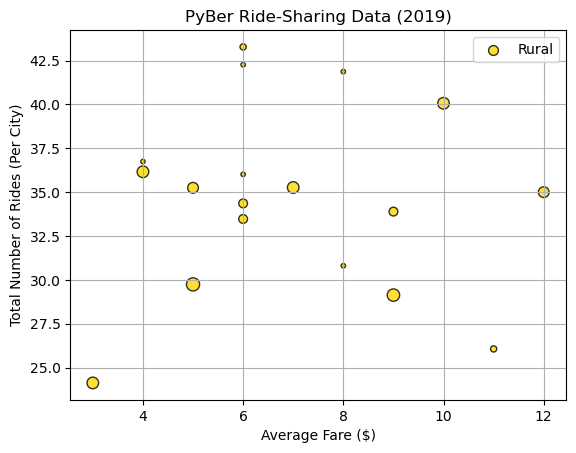

In [22]:
# Build the scatter plots for the Rural cities
plt.scatter(rural_ride_count,
            rural_avg_fare,
            s=10*rural_driver_count, c="gold",
            edgecolor="black", linewidths=1,
            alpha=0.8, label="Rural")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.xlabel("Average Fare ($)")
plt.ylabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()

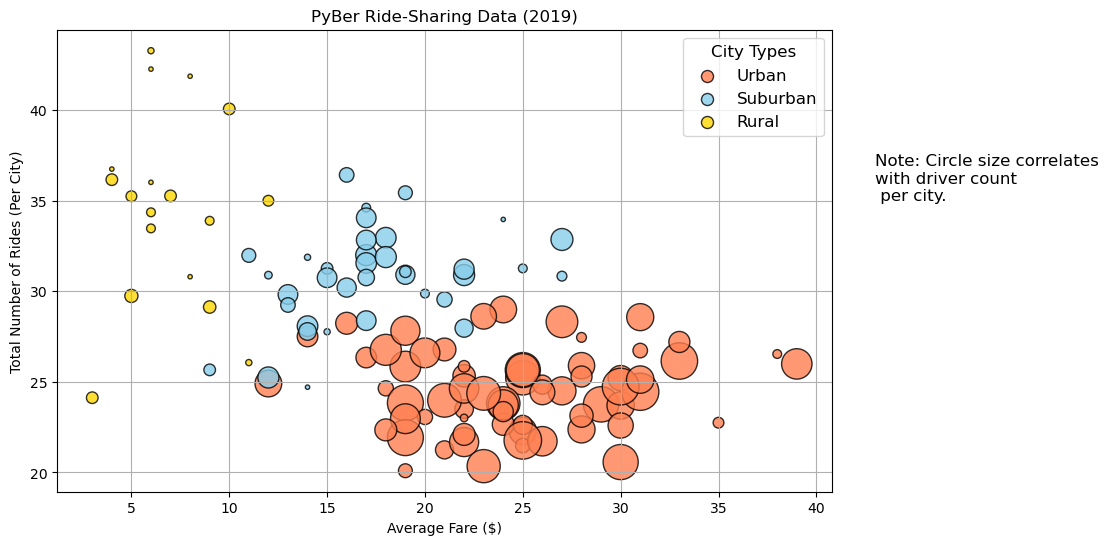

In [23]:
# Add the scatter charts for each type of city
plt.subplots(figsize=(10, 6))
plt.scatter(urban_ride_count,
            urban_avg_fare,
            s=10*urban_driver_count, c="coral",
            edgecolor="black", linewidths=1,
            alpha=0.8, label="Urban")

plt.scatter(suburban_ride_count,
            suburban_avg_fare,
            s=10*suburban_driver_count, c="skyblue",
            edgecolor="black", linewidths=1,
            alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count,
            rural_avg_fare,
            s=10*rural_driver_count, c="gold",
            edgecolor="black", linewidths=1,
            alpha=0.8, label="Rural")

# Graph context
plt.title("PyBer Ride-Sharing Data (2019)")
plt.xlabel("Average Fare ($)")
plt.ylabel("Total Number of Rides (Per City)")
plt.grid(True)

# Create a Legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
                 scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

#Incorporate a text label about circle size = driver count per city
plt.text(43, 35, "Note: Circle size correlates\nwith driver count\n per city.", fontsize="12")

# Save the figure
plt.savefig("analysis/Fig1.png", bbox_inches = "tight")

plt.show()

## Pandas describe() Function

In [24]:
# Get summary statistics
urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [25]:
# Get summary statistics
suburban_cities_df.describe()

,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364253e+12,5.000000
50%,30.750000,5.053221e+12,16.000000
75%,39.830000,7.551674e+12,21.000000
max,49.960000,9.917744e+12,25.000000


In [26]:
# Get summary statistics
rural_cities_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275364e+12,1.000000
50%,37.050000,4.023962e+12,4.000000
75%,47.070000,7.118047e+12,7.000000
max,58.550000,9.990581e+12,9.000000


In [27]:
# Get summary ride statistics
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [28]:
# Get summary ride statistics
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [29]:
# Get summary ride statistics
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

## Pandas mean(), median(), and mode() methods

In [30]:
# Calculate the mean of the ride count for each city type
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [31]:
# Calculate the mode of the ride count for the urban cities
urban_ride_count.mode()

0    22
1    25
dtype: int64

## NumPy mean() and median() Functions and SciPy mode() Function

In [32]:
#Import Numpy and the stats module for SciPy
import numpy as np
import scipy.stats as sts

In [33]:
# Calculate the measures of central tendency for the ride count for the urban cities
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")


The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).


## 5.4.2 Summary Statistics

In [34]:
# Get the fares for the urban cities
urban_fares = urban_cities_df["fare"]
urban_fares

0       13.83
1       30.24
2       33.44
3       23.44
4       34.58
        ...  
1620    39.40
1621    32.05
1622    38.53
1623     7.63
1624    27.57
Name: fare, Length: 1625, dtype: float64

In [35]:
# Calculate the measures of central tendency for the ride count for the urban cities
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is {mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is {median_urban_fares}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")


The mean fare price for urban trips is 24.53.
The median fare price for urban trips is 24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [36]:
# Calc central tendancy for suburban cities
suburban_fares = suburban_cities_df["fare"]
suburban_fares

mean_suburban_fares = np.mean(suburban_fares)
print(f"The mean fare price for suburban trips is {mean_suburban_fares:.2f}.")

median_suburban_fares = np.median(suburban_fares)
print(f"The median fare price for suburban trips is {median_suburban_fares}.")

mode_suburban_fares = sts.mode(suburban_fares)
print(f"The mode fare price for suburban trips is {mode_suburban_fares}.")

The mean fare price for suburban trips is 30.97.
The median fare price for suburban trips is 30.75.
The mode fare price for suburban trips is ModeResult(mode=array([17.99]), count=array([3])).


In [37]:
# Calc central tendancy for ruran cities
rural_fares = rural_cities_df["fare"]
rural_fares

mean_rural_fares = np.mean(rural_fares)
print(f"The mean fare price for rural trips is {mean_rural_fares:.2f}.")

median_rural_fares = np.median(rural_fares)
print(f"The median fare price for rural trips is {median_rural_fares}.")

mode_rural_fares = sts.mode(rural_fares)
print(f"The mode fare price for rural trips is {mode_rural_fares}.")

The mean fare price for rural trips is 34.62.
The median fare price for rural trips is 37.05.
The mode fare price for rural trips is ModeResult(mode=array([37.05]), count=array([2])).


In [38]:
# Get the driver count data from the urban cities
urban_drivers = urban_cities_df["driver_count"]
urban_drivers.head()

0     5
1    72
2    57
3    34
4    46
Name: driver_count, dtype: int64

In [39]:
# Mean, Median an Mode for Urban Driver count series
mean_urban_drivers = np.mean(urban_drivers)
print(f"The mean driver count for urban trips is {mean_urban_drivers:.2f}.")

median_urban_drivers = np.median(urban_drivers)
print(f"The median fare price for urban trips is {median_urban_drivers}.")

mode_urban_drivers = sts.mode(urban_drivers)
print(f"The mode fare price for urban trips is {mode_urban_drivers}.")


The mean driver count for urban trips is 36.68.
The median fare price for urban trips is 37.0.
The mode fare price for urban trips is ModeResult(mode=array([39], dtype=int64), count=array([86])).


In [40]:
# Mean, Median an Mode for Suburban Driver count series
suburban_drivers = suburban_cities_df["driver_count"]
suburban_drivers

mean_suburban_drivers = np.mean(suburban_drivers)
print(f"The mean drivers for suburban trips is {mean_suburban_drivers:.2f}.")

median_suburban_drivers = np.median(suburban_drivers)
print(f"The median drivers for suburban trips is {median_suburban_drivers}.")

mode_suburban_drivers = sts.mode(suburban_drivers)
print(f"The mode drivers for suburban trips is {mode_suburban_drivers}.")

The mean drivers for suburban trips is 13.71.
The median drivers for suburban trips is 16.0.
The mode drivers for suburban trips is ModeResult(mode=array([20], dtype=int64), count=array([79])).


In [41]:
# Calc central tendancy for ruran cities
rural_drivers = rural_cities_df["driver_count"]
rural_drivers

mean_rural_drivers = np.mean(rural_drivers)
print(f"The mean drivers for rural trips is {mean_rural_drivers:.2f}.")

median_rural_drivers = np.median(rural_drivers)
print(f"The median drivers for rural trips is {median_rural_drivers}.")

mode_rural_drivers = sts.mode(rural_drivers)
print(f"The mode drivers for rural trips is {mode_rural_drivers}.")

The mean drivers for rural trips is 4.30.
The median drivers for rural trips is 4.0.
The mode drivers for rural trips is ModeResult(mode=array([1], dtype=int64), count=array([32])).


## 5.4.4 Create Box-and-Whisker Plots

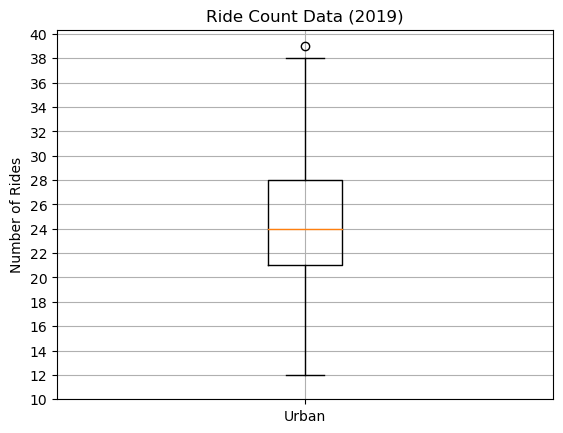

In [42]:
# Create a box-and-whisker plot for the urban cities ride count
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)

# Add the title, y-axis label and grid
ax.set_title("Ride Count Data (2019)")
ax.set_ylabel("Number of Rides")
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()

plt.show()

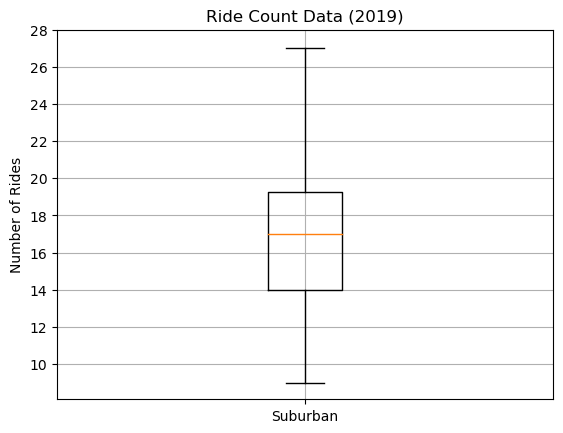

In [43]:
# Create a box-and-whisker plot for the Suburban cities ride count
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_ride_count, labels=x_labels)

# Add the title, y-axis label and grid
ax.set_title("Ride Count Data (2019)")
ax.set_ylabel("Number of Rides")
ax.set_yticks(np.arange(10, 30, step=2.0))
ax.grid()

plt.show()

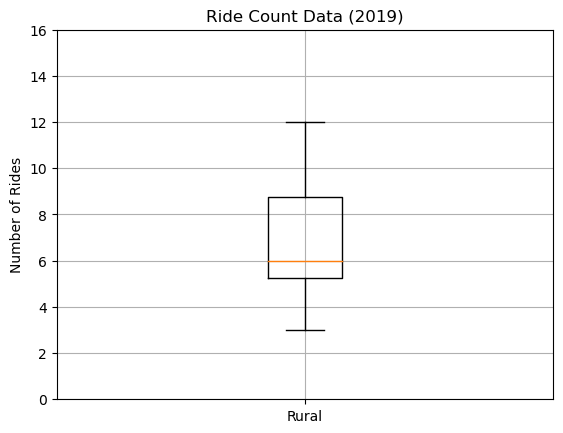

In [44]:
# Create a box-and-whisker plot for the rural cities ride count
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_ride_count, labels=x_labels)

# Add the title, y-axis label and grid
ax.set_title("Ride Count Data (2019)")
ax.set_ylabel("Number of Rides")
ax.set_yticks(np.arange(0, 18, step=2.0))
ax.grid()

plt.show()

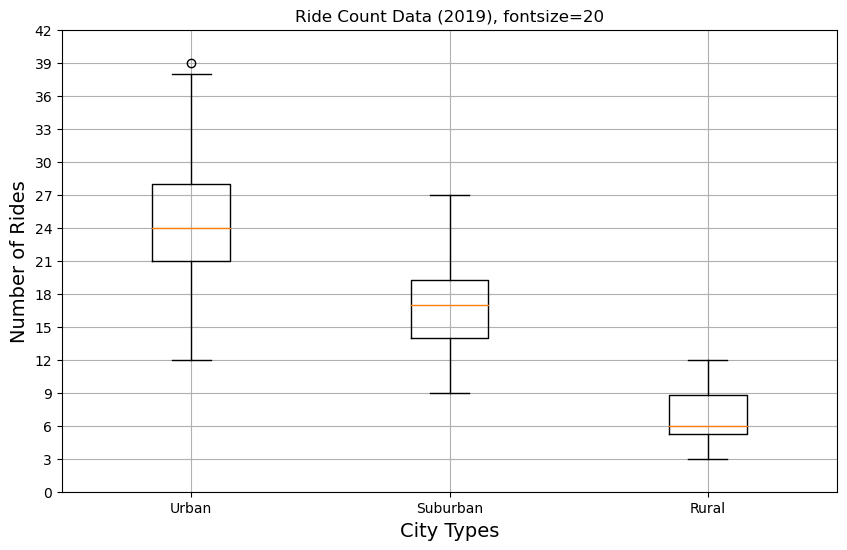

In [45]:
# Add all ride count box-and-whisker plots to the same graph ***
x_labels = ["Urban", "Suburban", "Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]

fix, ax = plt.subplots(figsize=(10,6))
ax.set_title("Ride Count Data (2019), fontsize=20")
ax.set_ylabel("Number of Rides", fontsize=14)
ax.set_xlabel("City Types", fontsize=14)

ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()

#Save the figure
plt.savefig("analysis/Fig2.png")
plt.show()

In [46]:
# Get the city that matches the outlier of 39
urban_city_outlier = urban_ride_count[urban_ride_count == 39].index[0]
print(f"{urban_city_outlier} has the highest ride count.")

West Angela has the highest ride count.


In [ ]:
# Create a box-and-whisker plot for the urban fare data.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_fares, labels=x_labels)

# Add the title, y-axis label and gride
ax.set_title("Ride Fare Data (2019)")
ax.set_ylabel("Fare ($US)")
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()

print("Summary Statistics")
urban_fares.describe()

In [ ]:
# Create a box-and-whisker plot for the Suburban fare data.
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_fares, labels=x_labels)

# Add the title, y-axis label and gride
ax.set_title("Ride Fare Data (2019)")
ax.set_ylabel("Fare ($US)")
ax.set_yticks(np.arange(5, 55, step=5.0))
ax.grid()
plt.show()

print("Summary Statistics")
suburban_fares.describe()

In [ ]:
# Create a box-and-whisker plot for the urban fare data.
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_fares, labels=x_labels)

# Add the title, y-axis label and gride
ax.set_title("Ride Fare Data (2019)")
ax.set_ylabel("Fare ($US)")
ax.set_yticks(np.arange(0, 70, step=5.0))
ax.grid()
plt.show()

print("Summary Statistics")
rural_fares.describe()

In [ ]:
# Add all fare count box-and-whisker plots to the same graph ***
x_labels = ["Urban", "Suburban", "Rural"]
fare_count_data = [urban_fares, suburban_fares, rural_fares]

fix, ax = plt.subplots(figsize=(10,6))
ax.set_title("Ride Count Data (2019), fontsize=20")
ax.set_ylabel("Number of Rides", fontsize=14)
ax.set_xlabel("City Types", fontsize=14)

ax.boxplot(fare_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 65, step=5.0))
ax.grid()

#Save the figure
plt.savefig("analysis/Fig3_fare.png")
plt.show()

In [ ]:
# Create a box-and-whisker plot for the urban driver count data.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_drivers, labels=x_labels)

# Add the title, y-axis label and gride
ax.set_title("Driver Count Data (2019)")
ax.set_ylabel("Number of Drivers")
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()

print("Summary Statistics")
urban_drivers.describe()

In [ ]:
# Create a box-and-whisker plot for the suburban driver count data.
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_drivers, labels=x_labels)

# Add the title, y-axis label and gride
ax.set_title("Driver Count Data (2019)")
ax.set_ylabel("Number of Drivers")
ax.set_yticks(np.arange(0, 40, step=5.0))
ax.grid()
plt.show()

print("Summary Statistics")
suburban_drivers.describe()

In [ ]:
# Create a box-and-whisker plot for the rural driver count data.
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_drivers, labels=x_labels)

# Add the title, y-axis label and gride
ax.set_title("Driver Count Data (2019)")
ax.set_ylabel("Number of Drivers")
ax.set_yticks(np.arange(0, 20, step=5.0))
ax.grid()
plt.show()

print("Summary Statistics")
rural_drivers.describe()

In [ ]:
# Add all driver count box-and-whisker plots to the same graph ***
x_labels = ["Urban", "Suburban", "Rural"]
driver_count_data = [urban_drivers, suburban_drivers, rural_drivers]

fix, ax = plt.subplots(figsize=(10,6))
ax.set_title("Driver Count Data (2019), fontsize=20")
ax.set_ylabel("Number of Drivers", fontsize=14)
ax.set_xlabel("City Types", fontsize=14)

ax.boxplot(driver_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 80, step=5.0))
ax.grid()

#Save the figure
plt.savefig("analysis/Fig4_driver.png")
plt.show()

## Percent of Fares for each city pie chart

In [ ]:
# Get the sum of the fares for each city type using groupby
sum_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]
sum_fares_by_type

In [ ]:
# Get the sum of all fares
total_fares = pyber_data_df["fare"].sum()
total_fares

In [ ]:
# Calculate the percentage or fares for each city type
type_percents = 100 * sum_fares_by_type / total_fares
type_percents

In [ ]:
# Do the same in 1 line
type_percents = 100 * pyber_data_df.groupby(["type"]).sum()["fare"] / pyber_data_df["fare"].sum()
type_percents

In [ ]:
# Build the percentage of fares by city type pie chart
plt.pie(type_percents, 
        labels=["Rural", "Suburban", "Urban"],
        colors=["gold", "lightskyblue", "lightcoral"],
        explode=[0,0,0.1],
        autopct="%1.1f%%",
        shadow=True,
        startangle=150)
plt.title("% of Total Fares by city Type")
# Show Figure
plt.show()

In [ ]:
# % of Total Fares
# Change font size
# Import mpl to change the plot configuration using rcParams
import matplotlib as mpl

# Build the percentage of fares by city type pie chart
plt.subplots(figsize=(10,6))
plt.pie(type_percents, 
        labels=["Rural", "Suburban", "Urban"],
        colors=["gold", "lightskyblue", "lightcoral"],
        explode=[0,0,0.1],
        autopct="%1.1f%%",
        shadow=True,
        startangle=150)
plt.title("% of Total Fares by city Type")

# Change the default font size from 10 to 14
mpl.rcParams["font.size"] = 14

# Save Figure
plt.savefig("analysis/Fig5_pie.png")
# Show Figure
plt.show()

In [ ]:
# % of Total Rides by City Type

# Get percentage
rides_by_city_percents = 100 * pyber_data_df.groupby(["type"]).count()["ride_id"] / pyber_data_df["ride_id"].count()
rides_by_city_percents

# Import mpl to change the plot configuration using rcParams
import matplotlib as mpl

# Build the percentage of fares by city type pie chart
plt.subplots(figsize=(10,6))
plt.pie(rides_by_city_percents, 
        labels=["Rural", "Suburban", "Urban"],
        colors=["gold", "lightskyblue", "lightcoral"],
        explode=[0,0,0.1],
        autopct="%1.1f%%",
        shadow=True,
        startangle=150)
plt.title("% of Total Rides by city Type")

# Change the default font size from 10 to 14
mpl.rcParams["font.size"] = 14

# Save Figure
plt.savefig("analysis/Fig6_rides_pie.png")
# Show Figure
plt.show()

In [ ]:
# % of Total Driversby City Type

# Get percentage
drivers_by_city_percents = 100 * pyber_data_df.groupby(["type"]).sum()["driver_count"] / pyber_data_df["driver_count"].sum()
drivers_by_city_percents

# Import mpl to change the plot configuration using rcParams
import matplotlib as mpl

# Build the percentage of fares by city type pie chart
plt.subplots(figsize=(10,6))
plt.pie(drivers_by_city_percents, 
        labels=["Rural", "Suburban", "Urban"],
        colors=["gold", "lightskyblue", "lightcoral"],
        explode=[0,0,0.1],
        autopct="%1.1f%%",
        shadow=True,
        startangle=165)
plt.title("% of Total Drivers by city Type")

# Change the default font size from 10 to 14
mpl.rcParams["font.size"] = 14

# Save Figure
plt.savefig("analysis/Fig75_rides_pie.png")
# Show Figure
plt.show()

In [ ]:
drivers_by_city_percents = 100 * city_data_df.groupby(["type"]).sum()["driver_count"] / city_data_df["driver_count"].sum()
drivers_by_city_percents

In [ ]:
# Get percentage
drivers_by_city_percents = 100 * pyber_data_df.groupby(["type"]).sum()["driver_count"] / pyber_data_df["driver_count"].sum()
drivers_by_city_percents

In [ ]:
# % of Total Driversby City Type

# Get percentage
drivers_by_city_percents = 100 * city_data_df.groupby(["type"]).count()["driver_count"] / city_data_df["driver_count"].count()
drivers_by_city_percents

# Import mpl to change the plot configuration using rcParams
import matplotlib as mpl

# Build the percentage of fares by city type pie chart
plt.subplots(figsize=(10,6))
plt.pie(drivers_by_city_percents, 
        labels=["Rural", "Suburban", "Urban"],
        colors=["gold", "lightskyblue", "lightcoral"],
        explode=[0,0,0.1],
        autopct="%1.1f%%",
        shadow=True,
        startangle=165)
plt.title("% of Total Drivers by city Type")

# Change the default font size from 10 to 14
mpl.rcParams["font.size"] = 14

# Save Figure
plt.savefig("analysis/Fig75_rides_pie.png")
# Show Figure
plt.show()